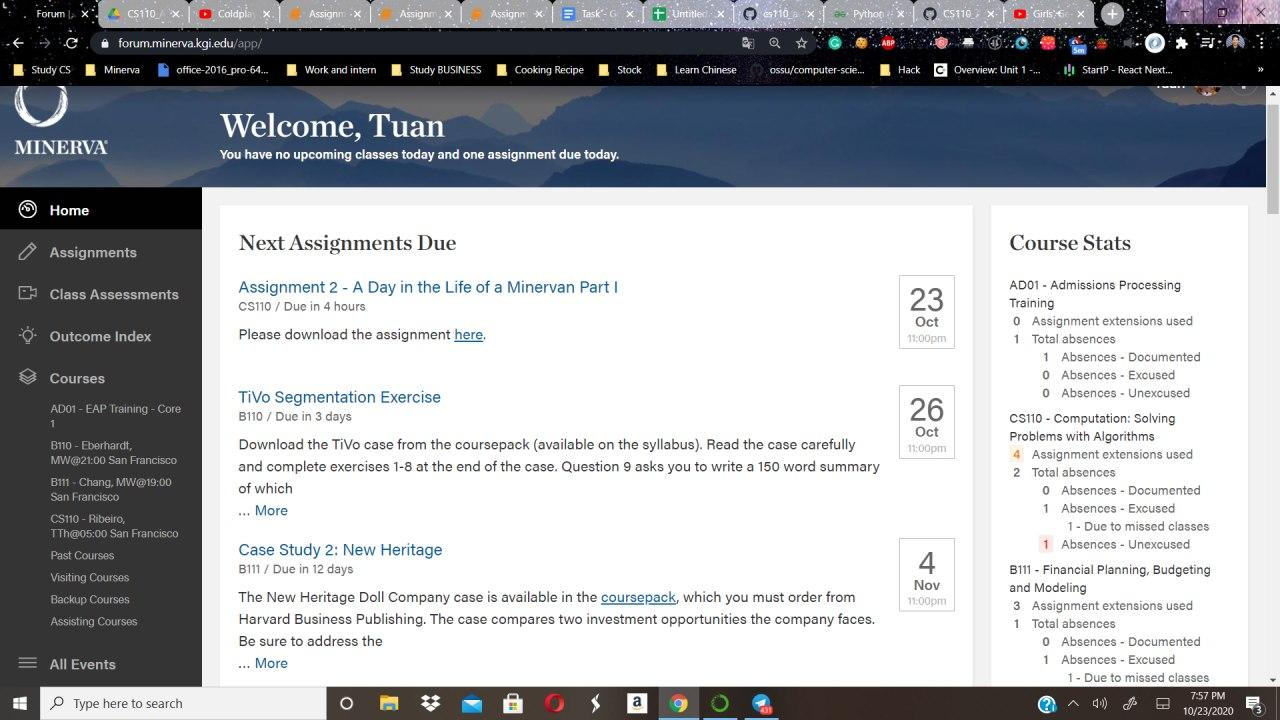

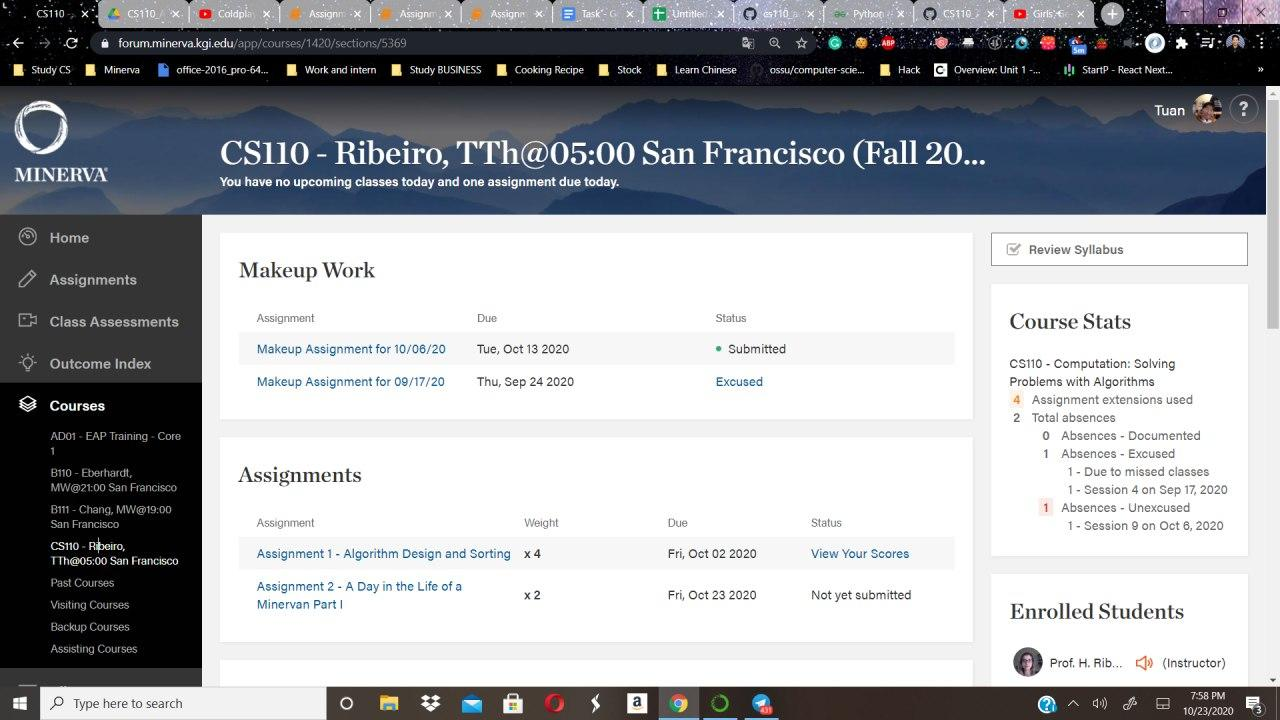

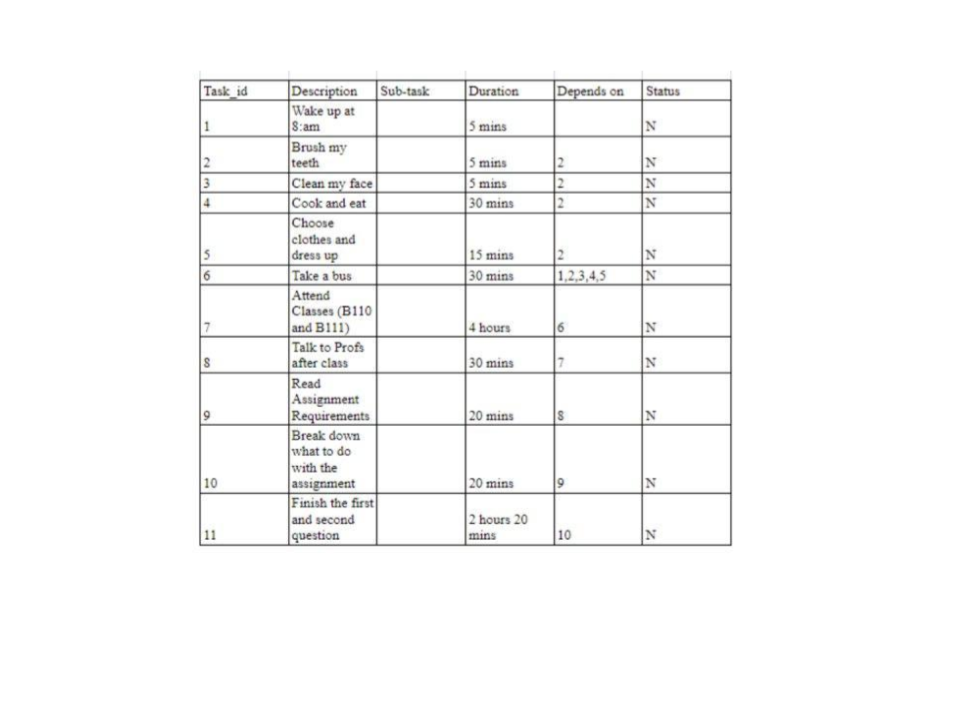

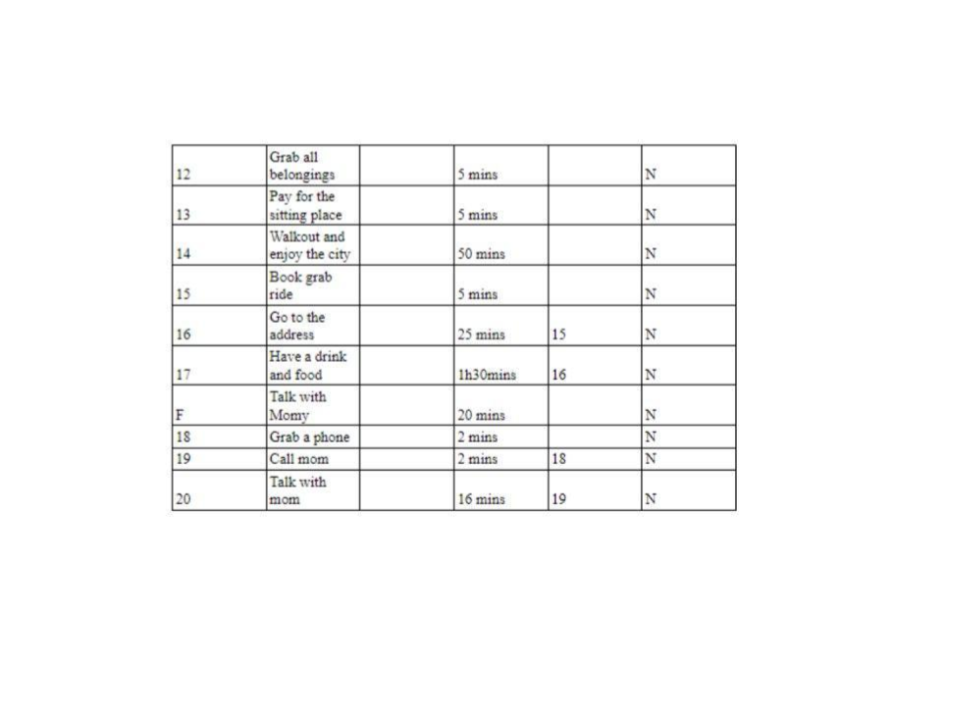

Question 1. For the activities and sub-activities, I use a list to store activities’ information. The list consists of multiple other lists, which each consists of different types of information such as task_id,task_description, dependencies, duration, and status. I do not distinguish between task and its sub-tasks. Rather, I record sub-task as an individual task dependent on other sub-tasks. For instance, the task “Talk with Momy” can be divided into three dependent subtasks such as “grab a phone”, “call mom”, and “ talk with mom”. To finish the whole task, we need to begin with the first task, which is “grab a phone” before preceding to other dependent tasks. Only after finishing “ grabbing a phone”, “call mom” would be executed. 

Question 2:
The following code is retrieved and modified from preclass work and assigned workbook in class ( section 7.1). Codes have been modified to fit the purpose of the exercise.

In [58]:
#Based on the property of binary tree,the following shows the index of left/right children or parent[i].
def left(i):             # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1       #          returns the array index of its left child.

def right(i):            # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2       #           returns the array index of its right child.

def parent(i):           # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2      #            returns the array index of its parent



class MaxHeapq:
    """ 
    This class implements properties and methods that support a max 
    priority queue data structure
    
    Attributes
    ----------
    heap : list
        A Python list where key values in the max heap are stored
        
    heap_size : int
        An integer counter of the number of keys present in the max heap
        
    """ 
    
    def __init__(self):
        """
        Class initialization method.
        
        Note
        ----
        Use heapq_var = MaxHeap()
        
        """
        #initialize self.heap as a list
        #initialize the heap_size as 0
        self.heap       = []
        self.heap_size  = 0

        
    def maxk(self):
        """
        This method returns the highest key in the priority queue
        
        Note
        ----
        Use key_var = heap_var.max()
        
        """
        #based on the property of max_heap, the largest element always lie at the root, which has index of 0
        return self.heap[0] 
    
     
    def heappush(self, task):   
        """
        Inserts the value of task onto the priority queue, maintaining the
        max heap invariant.
        
        Note
        ----
        Use heapq_var.heappush(task)
        
        """
        self.heap.append([-float("inf"),"not a task",0,[],-float("inf")])
        self.increase_task(self.heap_size,task)
        self.heap_size+=1
        
        
    def increase_task(self, i, task): 
        """
        This method implements the INCREASE_TASK operation, which modifies 
        the value of a task in the max priority queue with a higher value. 
        
        Note
        ----
        Use heapq_var.increase_task(i, new_task)
        
        """
        #consider when to update the value of a task based on different criteria such as duration.
        #compare the recent task versus the parent and did swap if neccessary.
        if task[2] < self.heap[i][2]:
            print('new task\'s duration is smaller than the current task\'duration ')
        self.heap[i] = task
        while i > 0 and self.heap[parent(i)][2] < self.heap[i][2]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j
        
    def heapify(self, i):
        """
        This method implements the MAX_HEAPIFY operation for the max priority
        queue. The input is the array index of the root node of the subtree to 
        be heapify.
        
        Note
        ----
        Use heapq_var.heapify(i)
        
        """
        l = left(i)
        r = right(i)
        heap = self.heap
        #make sure the index is in the range of heap-size- len of the heap.
        #compare if the duration of each task.
        if l <= (self.heap_size-1) and heap[l][2]>heap[i][2]: #and len(heap[l][3])<1 and len(heap[i][3])<1:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r][2] > heap[largest][2]: #and len(heap[l][3])<1 and len(heap[i][3])<1:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)


    def heappop(self):
        """
        This method implements the EXTRACT_MAX operation. It returns the largest
        key in the max priority queue and removes this key from the max priority 
        queue.
        
        Note
        ----
        Use key_var = heapq_var.heappop() 
        
        """
        #in case the heap_size <1, which means there is no task in the priority queue.
        if self.heap_size < 1:
            print('Heap underflow: There are no task in the priority queue ')
        maxk = self.heap[0]
        #max- the top value would be popped out and the size of the heap decrease by 1.
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

In [59]:
"""
A Simple Daily Task Scheduler Using Priority Queues
"""
#define a function that takes in a list of tasks
def print_input_tasks(tsks):
    """ 
    Input: list of tasks 
    Task Status:
    - 'N' : Not yet in priority queue (default status)
    - "I" : In queue
    - 'C' : Completed
    Output: print statement with all the tasks to be included in the scheduler
    """
    print('Input List of Tasks')
#use for loop to print details of the task, each task consisting of id, duration, dependencies, priority score and status
    for t in tsks:
        print(f"task:{t[0]} \t {t[1]} \t duration:{t[2]} \t depends on: {t[3]} \t Status: {t[4]}" )

def initialize_tasks(tsks):
    """
    Input: list of tasks 
    Output: initializes all tasks with default status (not yet in the priority queue).
    """  
    #for is used to loop through the all tasks and add a default status for each task, which is N
    for i in tsks:
        i.append("N")
def unscheduled_tasks(tsks):
    """
    Input: list of tasks
    Output: boolean to checks whether tasks have been scheduled and return No if at least one of tasks'status is N.
    """
    #check whether at least one task is not scheduled.
    for i in tsks:
        if tsks[4]!=[N]:
            return False
    return True

def remove_dependency(tsks,tid):
    """
    Input: list of tasks and task_id of the task just completed
    Output: lists of tasks with t_id removed
    """
    #for loop through all tasks and remove dependecies of each task.
    for i in range(len(tsks)):
        if tsks[i][0]!= tid and tid in tsks[i][3]:
            tsks[i][3].remove(tid)




In [67]:


tasks = [[0, 'Wake up at 8:00 AM     ', 5, []],  
         [1, 'brush my teeth            ', 5, [0]],
         [2, 'clean my face             ',5, [0]],
         [3, 'cook and eat               ',30,[0]],
         [4, 'choose clothes and dress up',15,[0]],
         [5, 'take a bus                 ',30,[4]],
         [6, 'attend both classes        ',240,[5]],
         [7, 'talk to professors         ',30,[6]],
         [8,"read assignment requirements         ",20,[7]],
         [9,"Break down what to do with the assignment",20,[8]],
         [10,"Finish the first and second question",140,[9]],
         [11,"Grab all belongings ",5,[10]],
         [12,"Pay for the sitting place",5,[10]],
         [13,"Walkout and enjoy the city",50,[11,12]],
         [14,"Book grab ride",5,[10]],
         [15,"Go to the address",25,[14]],
         [16,"Have a drink and food",95,[15]],
         [17,"Grab a phone",2,[16]],
         [18,"Call mom",2,[17]],
         [19,"Talk with mom",16,[18]],]
initialize_tasks(tasks)
print_input_tasks(tasks)




Input List of Tasks
task:0 	 Wake up at 8:00 AM      	 duration:5 	 depends on: [] 	 Status: N
task:1 	 brush my teeth             	 duration:5 	 depends on: [0] 	 Status: N
task:2 	 clean my face              	 duration:5 	 depends on: [0] 	 Status: N
task:3 	 cook and eat                	 duration:30 	 depends on: [0] 	 Status: N
task:4 	 choose clothes and dress up 	 duration:15 	 depends on: [0] 	 Status: N
task:5 	 take a bus                  	 duration:30 	 depends on: [4] 	 Status: N
task:6 	 attend both classes         	 duration:240 	 depends on: [5] 	 Status: N
task:7 	 talk to professors          	 duration:30 	 depends on: [6] 	 Status: N
task:8 	 read assignment requirements          	 duration:20 	 depends on: [7] 	 Status: N
task:9 	 Break down what to do with the assignment 	 duration:20 	 depends on: [8] 	 Status: N
task:10 	 Finish the first and second question 	 duration:140 	 depends on: [9] 	 Status: N
task:11 	 Grab all belongings  	 duration:5 	 depends on: [10] 

In [68]:
def get_ready_tsks(tsks):
    """ 
    Implements step 1 of the scheduler
    Input: list of tasks
    Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
    """
    rtsks = []
    for i in range(ntasks):
        if tsks[i][5] == 'N' and len(tsks[i][3]) == 0:   
            tsks[i][5] = 'I'                      
            rtsks.append(tsks[i])  # add the information of the task to the list    
    return rtsks

#set the size to be 30 mins.
step_size =30
#set up the intitial time at 8 am.
c_time = 480
ntasks = len(tasks)  # Number of tasks
pqueue = MaxHeapq()


# Inputs Parameters to the Scheduler
# Priority Queue
# STEP 0: Initialize the status of all tasks in the input list
initialize_tasks(tasks)
# print_input_tasks(tasks)

# STEP 1: Extract a list of tasks without dependencies
ready_queue = get_ready_tsks(tasks)

# STEP 2: Insert task onto a priority queue
#for each task in the ready_queue, which each task has no dependency, we add the task into the pqueue, so it can executed.
for task in ready_queue:
    pqueue.heappush(task)
    
# STEP 3: Check for tasks in the priority queue
#if the pqueue has tasks to be executed:
while pqueue.heap_size > 0:
    # STEP 4: Pop out the task on top of the priority queue
    
    for i in range(pqueue.heap_size):
        #priority_task is a list consisting of all pqueue tasks.
        priority_task = pqueue.heappop()
        
        print(f"Scheduler at time {c_time//60}h{c_time%60}m executing “{priority_task[1]}“; remaining time to complete {priority_task[2]}min")
        
        # STEP 5: Update task's remaining time
        priority_task[2] -= step_size
        c_time += step_size
        if priority_task[2] > 0:
            # STEP 6: Insert task back onto the priority queue
            pqueue.heappush(top_task)
        else:
            # STEP 7: Mark task as completed and update all the dependencies in the list of tasks
            priority_task[5] = 'C'
            print(f"Completed Task “{priority_task[1]}“ at {(c_time+ priority_task[2])//60}h{(c_time+ priority_task[2])%60}m")

            remove_dependency(tasks, priority_task[0])
    
            # Go back to STEP 1 and STEP 2
            rtsks = get_ready_tsks(tasks)
            for task in rtsks:
                pqueue.heappush(task)

Scheduler at time 8h0m executing “Wake up at 8:00 AM     “; remaining time to complete 5min
Completed Task “Wake up at 8:00 AM     “ at 8h5m
Scheduler at time 8h30m executing “cook and eat               “; remaining time to complete 30min
Completed Task “cook and eat               “ at 9h0m
Scheduler at time 9h0m executing “choose clothes and dress up“; remaining time to complete 15min
Completed Task “choose clothes and dress up“ at 9h15m
Scheduler at time 9h30m executing “take a bus                 “; remaining time to complete 30min
Completed Task “take a bus                 “ at 10h0m
Scheduler at time 10h0m executing “attend both classes        “; remaining time to complete 240min
Scheduler at time 10h30m executing “attend both classes        “; remaining time to complete 210min
Scheduler at time 11h0m executing “attend both classes        “; remaining time to complete 180min
Scheduler at time 11h30m executing “attend both classes        “; remaining time to complete 150min
Schedul

Question3:
1. Firstly, I would add extra element to the task to indicate whether the task can be set as multi-tasking. To denote a task that cannot be executed at the same time, I use the None value. Otherwise, I use an integer value to denote a new time a task takes to finish the task.
2. Another novel aspect would be to count how many tasks are finished at the same time. For instance, if I both clean my teeth and wash my face, the indicator would show that 2 tasks are being executed at the same time. 


In [69]:
task1 = [[0, 'Wake up at 8:00 AM     ', 5, [],2],  
         [1, 'brush my teeth            ', 5, [0],3],
         [2, 'clean my face             ',5, [0],3],
         [3, 'cook and eat               ',30,[0],15],
         [4, 'choose clothes and dress up',15,[0],10],
         [5, 'take a bus                 ',30,[4],30],
         [6, 'attend both classes        ',240,[5],None],
         [7, 'talk to professors         ',30,[6],None],
         [8,"read assignment requirements         ",20,[7],None],
         [9,"Break down what to do with the assignment",20,[8],None],
         [10,"Finish the first and second question",140,[9],None],
         [11,"Grab all belongings ",5,[10],3],
         [12,"Pay for the sitting place",5,[10],3],
         [13,"Walkout and enjoy the city",50,[11,12],30],
         [14,"Book grab ride",5,[10],5],
         [15,"Go to the address",25,[14],25],
         [16,"Have a drink and food",95,[15],60],
         [17,"Grab a phone",2,[16],1],
         [18,"Call mom",2,[17],1],
         [19,"Talk with mom",16,[18],10],]

In [37]:
#define a function that takes into three parameter such as tasks, step_size, and ini_time
def multiple_task_scheduler(tasks,step_size,ini_time):
    time = ini_time
    #append the initial status to each task, N - Not completed.
    for t in range(len(tasks)):
        tasks[t].append("N")
    #if there are still tasks in the queue
    while True:
        #initialize the default state of multitasking to False.
        multitasking = False
        #collect tasks that do not have any dependencies and tasks which are not denoted as completed or 
        execute_tasks = [task for task in tasks if (task[5]!="C") and (task[5]!="I") and task[3]==[]]
        # if there is no task to be executed/performed, we end the scheduler and counts how many tasks have been executed.
        if len(execute_tasks)==0:
            #collect the status of all tasks
            status = [task[5] for task in tasks]
            completed = 0
            #for loop through the range of the list to check whether the tasks have been completed. 
            for t in range(len(tasks)):
                if status[i]=="C":
                    #for each task completed, the completed task would increase by 1
                    completed= completed+1
            #if the number of finished tasks equal the total tasks
            if completed == len(tasks):
                print("All tasks have been completed")
            else:
                print("No further action can be performed. Check dependencies")
            #use break to exit the loop 
            break
        # Insert the tasks into a priority queue heap
        #Creates the MaxHeapq object
        tqueue = MaxHeapq()
        for task in execute_tasks:
            tqueue.heappush(task)
        #current_task to be performed:
        current_task = tqueue.heappop()
        #Decide whether the tasks can be co-performed.
        #if the task "multi-task" status is not None and the heap_size is not 0
        if current_task[4] != None and tqueue.heap_size != 0:
            #Collect all possible tasks that can be multitasked into a list
            #use comprehension loop to choose the task that fulfilled "multitasking" status, "no dependencies",
            #and "has not completed "
            multitask = [task for task in tasks if (task[4] != None) and (task[3] == []) and (task[5] != "C")]
            
            multitask.remove(current_task)
            
            #decide on which tasks to multitask
            #if the list does not empty:
            if multitask != []:
                multitask = multitask[0]
                original_time_t = current_task[4]
                original_time_m = multitask[4]
                multitasking = True
        
        #Iterate when there is still time left on the current task.
        if multitasking == False:
            
            while True:
            
                print("Scheduler at time: ", int(time // 60), ":", time % 60, " executing task ", current_task[0],
                      " Time remaining:", current_task[2])
            
                #Step 5 - Perform the task for step_size minutes
                current_task[2] -= step_size
                time += step_size
            
                #Step 7 - Determines when task is complete
                if current_task[2] <= 0:
                    #Check the task as it completes and also record the time.
                    time += current_task[2]
                    tasks[current_task[0]][5] = "C"
                
                    #Removes the task from other's dependencies.
                    current_id = current_task[0]
                    for task in tasks:
                        length = len(task[3])
                        i = 0
                        while i < length:
                            if task[3][i] == current_id:
                                task[3].remove(task[3][i])
                                length -= 1
                            i += 1
                    print("Finished Task: ", current_id, " - ", current_task[1])
                
                    #Exits the inner while loop
                    break
        
            
                #Step 6 - returns the task into the queue
                tqueue.heappush(current_task)
            
                current_task = tqueue.heappop()
        #in case we multitask:
        elif multitasking == True:
            while True:
            
                print("Scheduler at time: ", int(time // 60), ":", time % 60, " executing tasks ", current_task[0],
                      " and ", multitask[0], " Time remaining:", current_task[4],
                     " and ", multitask[4], ", respectively")
            
                #Step 5 - Perform the task for step_size minutes
                current_task[4] -= step_size
                multitask[4] -= step_size
                
                time += step_size
            
                #Step 7 - Check if task is complete
                if current_task[4] <= 0:
                    #Check the task as it completes and also record the time.
                    time += current_task[4]
                    tasks[current_task[0]][5] = "C"
                
                    #Remove the task a dependency in other tasks.
                    current_id = current_task[0]
                    for task in tasks:
                        length = len(task[3])
                        i = 0
                        while i < length:
                            if task[3][i] == current_id:
                                task[3].remove(task[3][i])
                                length -= 1
                            i += 1
                    print("Finished Task: ", current_id, " - ", current_task[1])
                
                    #Removes some time from the task time even if I'm not multitasking
                    # - This is because we have completed some of it at least
                    multitask[2] = ((original_time_m - multitask[4]) / 3) * 2
                    tasks[multitask[0]][2] = ((original_time_m - multitask[4]) / 3) * 2
                    
                    #Exits the inner while loop
                    break
                if multitask[4] <= 0:
                    #Check the task as it completes and also record the time.
                    time += multitask[4]
                    tasks[multitask[0]][5] = "C"
                
                    #Remove the task a dependency in other tasks.
                    current_id = multitask[0]
                    for task in tasks:
                        length = len(task[3])
                        i = 0
                        while i < length:
                            if task[3][i] == current_id:
                                task[3].remove(task[3][i])
                                length -= 1
                            i += 1
                
                    #States that the task is complete
                    print("Finished Task: ", current_id, " - ", multitask[1])
                
                    #Decrease task's time when the tasks are not multitasking
                    current_task[2] -= ((original_time_t - current_task[4]) / 3) * 2
                    tasks[current_task[0]][2] -= ((original_time_t - current_task[4]) / 3) * 2
                    
                    #Exits the inner while loop
                    break
        
            
                #Bring the task back to the queue.
                tqueue.heappush(current_task)
            
                current_task = tqueue.heappop()

multiple_task_scheduler(task1,30,420)
        
        

Scheduler at time:  7 : 0  executing task  0  Time remaining: 5
Finished Task:  0  -  Wake up at 8:00 AM     
Scheduler at time:  7 : 5  executing tasks  3  and  1  Time remaining: 15  and  3 , respectively
Finished Task:  3  -  cook and eat               
Scheduler at time:  7 : 20  executing tasks  1  and  2  Time remaining: -27  and  3 , respectively
Finished Task:  1  -  brush my teeth            
Scheduler at time:  6 : 53  executing tasks  2  and  4  Time remaining: -27  and  10 , respectively
Finished Task:  2  -  clean my face             
Scheduler at time:  6 : 26  executing task  4  Time remaining: 20.0
Finished Task:  4  -  choose clothes and dress up
Scheduler at time:  6 : 46.0  executing task  5  Time remaining: 30
Finished Task:  5  -  take a bus                 
Scheduler at time:  7 : 16.0  executing task  6  Time remaining: 240
Scheduler at time:  7 : 46.0  executing task  6  Time remaining: 210
Scheduler at time:  8 : 16.0  executing task  6  Time remaining: 180
Sch

Question 5: Due to the usage of Python class, we can use more elements and criteria for sorting the tasks rather than those mentioned above. The changes to elemenent of tasks comes with a little cost to the change of algorithm. For instance, instead of comparing duration, we can compare the priority of each task. The max heap allows us to give a priority to each task that we have. I envisioned my code to fail when multiple tasks are running at the same time because this code only allows 2 tasks to be completed at the same time. Another improvement should be made, such as allowing multiple tasks to be executed at the same time. I do think about using class for creating and monitoring the tasks. A great benefit of following the design is the acceleration of thinking process which I can have already stated criteria for comparing tasks and diciding which one should be prioritized. The usage of list is familiar with me, which further helps me to improve the code and efficiently use them without worrying about other methods of storing data. 

#breakitdown: break the problems into subproblem and solving them using python- considering using edge cases.
#professionalism: applied and followed the guidelines of the requirements.
#organization: presented different tasks in different cell and clearly showed how each cell is conntected to each other to highlight the main point.